# Métodos de Monte Carlo

Juan Sosa PhD

Email jcsosam@unal.edu.co

GitHub https://github.com/jstats1702

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
from matplotlib import pyplot as plt
%matplotlib inline

## 1 Introducción

El objetivo consiste en **aproximar cualquier cantidad** asociada con la distribución posterior de $\boldsymbol{\theta}$.

Si podemos obtener muestras de $\boldsymbol{\theta}$ procedentes de la distribución posterior, **cualquier cantidad posterior** de interés se puede **aproximar con un grado de precisión arbitrario** usando **métodos de Monte Carlo** (Stanislaw Ulam, John von Neumann, Nicholas Metropolis).

Los **métodos de Monte Carlo** son algoritmos computacionales que se basan en un **muestreo aleatorio iterativo** para obtener **resultados numéricos**. El concepto subyacente es utilizar la aleatoriedad para **resolver problemas** tanto **estocásticos** (generación de muestras de una distribución de probabilidad) como **determinísticos** (optimización, integración numérica).

**Cualquier distribución de probabilidad** (y por ende cualquier característica de esa distribución) se puede **aproximar arbitrariamente bien** tomando tantas **muestras aleatorias de esa distribución** como sea necesario **dependiendo del nivel de precisión** que se requiera.



## 2 Ejemplo: Distribución Gamma

Aproximación de una distribución Gamma con diferentes niveles de precisión.

In [2]:
# parametros distribucion Gamma
a = 68
b = 45
# tamaños
m = [50, 250, 1250]
# simulacion con diferentes niveles de precision
np.random.seed(1234)
theta_sim = {}
for j in range(len(m)):
    theta_sim[j] = st.gamma.rvs(a, scale = 1/b ,size = m[j])

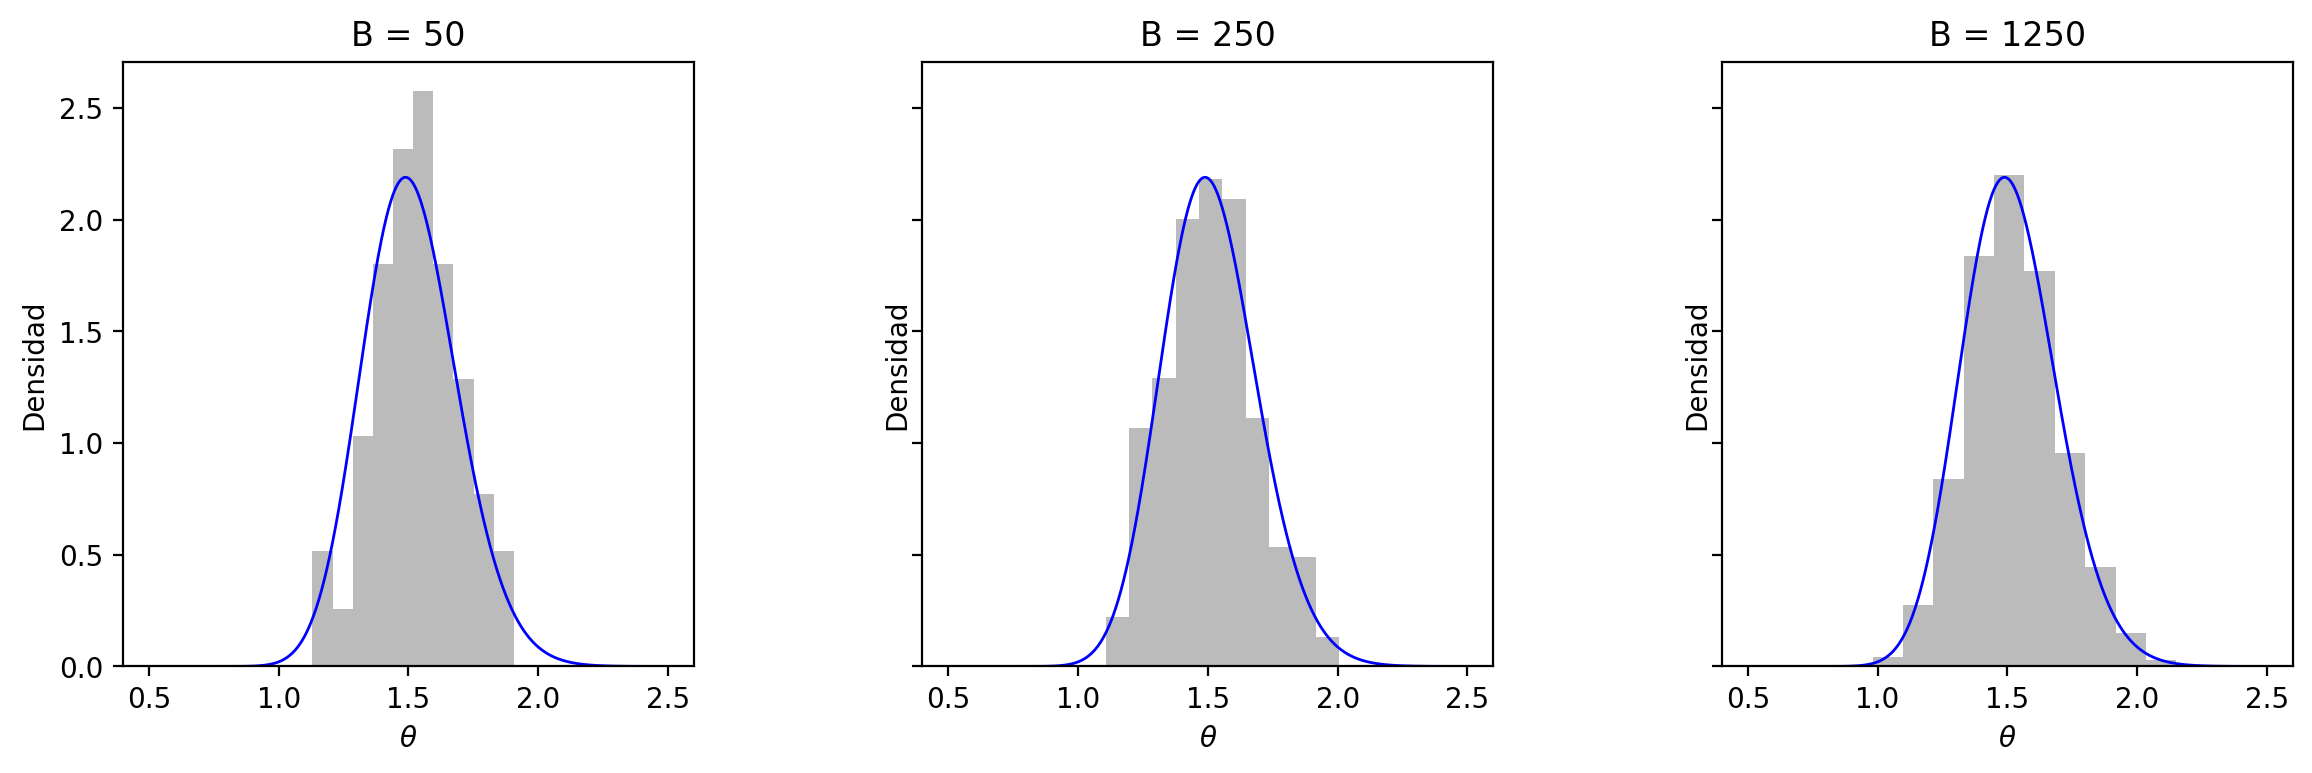

In [3]:
# grafico
x = np.linspace(start = 0.5, stop = 2.5, num = 1000)
f, axes = plt.subplots(1, 3, figsize = (14, 4), sharey = True, dpi = 200)
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)
for j in range(len(m)):
    axes[j].hist(x = theta_sim[j], density = True, color = '#bbbbbb')
    axes[j].plot(x,st.gamma.pdf(x, a, scale = 1/b), color = 'b', linewidth = 1)
    axes[j].set_title('B = ' + str(m[j]))
    axes[j].set_xlabel(r'$\theta$')
    axes[j].set_ylabel('Densidad')

## 3 Implementación

Sea $\theta$ un parámetro de interés y $\boldsymbol{y} = (y_1,\dots,y_n)$ un conjunto de observaciones. Suponga que **es posible obtener una muestra aleatoria** de $B$ valores de $\theta$ asociados con la **distribución posterior** $p(\theta\mid \boldsymbol{y})$, esto es,
$$
\theta^{(1)},\ldots,\theta^{(B)}\stackrel{\text{iid}}{\sim} p(\theta\mid \boldsymbol{y})\,.
$$

La **distribución empírica** de $\theta^{(1)},\ldots,\theta^{(B)}$ **aproxima** la **distribución posterior** $p(\theta\mid \boldsymbol{y})$ y tal aproximación puede ser **tan precisa como se quiera** incrementando el valor de $B$. Esta aproximación se conoce como la **aproximación de Monte Carlo** de $p(\theta\mid \boldsymbol{y})$. 

**(Ley débil de los grandes números).** Sea $X_1,\ldots,X_n$ una secuencia de variables aleatorias independientes e idénticamente distribuidas con media $\mu$ y varianza finita $\sigma^2$. Entonces, el promedio muestral $\bar{X}_n = \frac{1}{n}\sum_{i=1}^n X_i$ **converge en probabilidad** a $\mu$ cuando $n\rightarrow\infty$, i.e., para todo $\epsilon > 0$ se tiene que
$$
\lim\limits_{n\to\infty}\textsf{Pr}(|\bar{X}_n - \mu| > \epsilon) = 0\,.
$$

La **ley débil de los grandes números** garantiza que, si $\theta^{(1)},\ldots,\theta^{(B)}\stackrel{\text{iid}}{\sim} p(\theta\mid \boldsymbol{y})$, entonces
$$
\frac{1}{B}\sum_{b=1}^{B} g\left(\theta^{(b)}\right)\longrightarrow \int_\Theta g(\theta)\,p(\theta\mid \boldsymbol{y})\,\text{d}\theta = \textsf{E}(g(\theta)\mid \boldsymbol{y})\,\,\text{cuando $B\rightarrow\infty$},
$$
donde $g(\theta)$ es una función arbitraria de $\theta$. 

Por lo tanto:

- **Media** posterior: 
$$
\bar{\theta}_B=\frac{1}{B}\sum_{b=1}^{B}\theta^{(b)}\longrightarrow\textsf{E}(\theta\mid \boldsymbol{y}) = \int_\Theta \theta\,p(\theta\mid\boldsymbol{y})\,\text{d}\theta\,.
$$
- **Varianza** posterior:
$$
\frac{1}{B-1}\sum_{b=1}^{B}(\theta^{(b)} - \bar{\theta})^2\longrightarrow\textsf{Var}(\theta\mid \boldsymbol{y}) = \textsf{E}\left((\theta-\textsf{E}(\theta\mid\boldsymbol{y}))^2\mid\boldsymbol{y}\right) = \int_\Theta \left(\theta - \textsf{E}(\theta\mid\boldsymbol{y})\right)^2\,p(\theta\mid\boldsymbol{y})\,\text{d}\theta\,.
$$
- **Probabilidad** posterior:
$$
\frac{1}{B}\sum_{b=1}^{B}I( \theta^{(b)}\in A )\longrightarrow\textsf{Pr}(\theta\in A\mid \boldsymbol{y}) = \textsf{E}\left(I ( \theta\in A ) \mid \boldsymbol{y} \right) = \int_\Theta I( \theta\in A )\,p(\theta\mid\boldsymbol{y})\,\text{d}\theta\,.
$$

## 4 Inferencia sobre una función arbitraria de $\theta$ 

Los métodos de Monte Carlo permiten hacer fácilmente inferencia posterior sobre cualquier **función arbitraria** de $\theta$, digamos $\gamma = g(\theta)$:

- Simular $\theta^{(1)},\ldots,\theta^{(B)} \stackrel{\text{iid}}{\sim} p(\theta\mid \boldsymbol{y})$.
- Calcular $\gamma^{(b)} = g\left(\theta^{(b)}\right)$ para $b=1,\ldots,B$. 

La secuencia $\gamma^{(1)},\ldots,\gamma^{(B)}$ constituye un conjunto de valores independientes de $p(\gamma\mid \boldsymbol{y})$ con los cuales se puede hacer inferencia posterior sobre cualquier aspecto de $\gamma$.


## 5 Bondad de ajuste

Los métodos de Monte Carlo también permiten examinar detalladamente la **distribución predictiva posterior** $p(y^*\mid\boldsymbol{y})$, lo que hace posible chequear la **bondad de ajuste interna del modelo** por medio **estadísticos de prueba** calculados a partir de la distribución predictiva posterior:

- Simular $\theta^{(1)},\ldots,\theta^{(B)} \stackrel{\text{iid}}{\sim} p(\theta\mid \boldsymbol{y})$.
- Simular $(y^*_1)^{(b)},\ldots,(y^*_n)^{(b)} \stackrel{\text{iid}}{\sim} p\left(y\mid\theta^{(b)}\right)$ para $b=1,\dots,B$.
- Calcular $t^{(b)}=t((y^*_1)^{(b)},\ldots,(y^*_n)^{(b)})$ para $b=1,\dots,B$, donde $t(\cdot)$ es una estadístico de interés (denominado **estadístico de prueba**). 
- Comparar la distribución de $t^{(1)},\ldots,t^{(B)}$  con el **valor observado** $t_0=t(y_1,\ldots,y_n)$.

Si $t_0$ es un **valor típico de la distribución** de $t^{(1)},\ldots,t^{(B)}$, entonces se dice que el modelo **captura adecuadamente la característica de interés** que representa el estadístico de prueba. 

Se recomienda evaluar todos aquellos aspectos de la población que sea de interés caracterizar por medio del modelo.


## 6 Ejemplo: Número de hijos y educación

COLOMBIA - Censo Nacional de Población y Vivienda - CNPV - 2018 disponible en https://microdatos.dane.gov.co/index.php/catalog/643/study-description

La tabla de Personas contiene la información de una muestra aleatoria simple de personas que residen en hogares particulares o personas que residen en lugares especiales de alojamiento con las características correspondientes al censo.

Modelar el número de hijos de personas identificadas como: mujer, jefe de hogar, 40 a 44 años, alfabeta, lugar de nacimiento en Colombia, lugar de residencia hace 5 años en Colombia, ningún grupo étnico, informa si tiene hijos o no.

Diccionario de datos (ddi-documentation-spanish-643.pdf) disponible en https://microdatos.dane.gov.co/index.php/catalog/643/datafile/F11


### 6.1 Aproximaciones con diferentes niveles de precisión


In [4]:
# modelo Gamma-Poisson
# datos mujeres con educacion superior
n = 110
s = 127
# hiperparametros
a = 2
b = 1
# tamaños
m = [5, 500, 50000]
# simulacion con diferentes niveles de precision
np.random.seed(1234)
theta_sim = {}
for j in range(len(m)):
    theta_sim[j] = st.gamma.rvs(a + s, scale = 1/(b+n), size = m[j])
# media posterior aproximada
tab = np.array([np.mean(theta_sim[0]), np.mean(theta_sim[1]), np.mean(theta_sim[2]), (a + s)/(b + n)])
tab = pd.DataFrame(data = tab, columns = ["Estimación"], index = ['B = '+str(k) for k in m] + ['Exacto'])
print(tab)

           Estimación
B = 5        1.149941
B = 500      1.167439
B = 50000    1.162492
Exacto       1.162162


In [5]:
# intervalo de credibilidad al 95% aproximado
tab = []
for j in range(len(m)):
    tab.append(np.quantile(theta_sim[j], q = [0.025, 0.975]))
tab.append(st.gamma.ppf(q = [0.025, 0.975], a = a + s, scale = 1/(b+n)))
tab = pd.DataFrame(data = tab, columns = ["Q2.5%", "Q97.5%"], index = ['B = '+str(k) for k in m] + ['Exacto'])
print(tab)

              Q2.5%    Q97.5%
B = 5      1.046203  1.247783
B = 500    0.986379  1.371111
B = 50000  0.972290  1.371270
Exacto     0.970278  1.371103


### 6.2 Inferencia sobre $\gamma = \theta_1 - \theta_2$

In [6]:
# datos mujeres sin educacion superior
n1 = 355
s1 = 748
# datos muejeres con educacion superior
n2 = 110   
s2 = 127
# hiperparametros
a = 2
b = 1
# numero de muestras de MC 
B = 50000
# simulacion
np.random.seed(1234)
theta1_mc = st.gamma.rvs(a + s1, scale = 1/(b + n1), size = B)
theta2_mc = st.gamma.rvs(a + s2, scale = 1/(b + n2), size = B)
gamma_mc = theta1_mc - theta2_mc
# probabilidad posterior de que gamma > 0
round(np.mean(gamma_mc > 0), 3)

1.0

In [7]:
# estimacion puntual de gamma
round(np.mean(gamma_mc), 3)

0.945

In [8]:
# intervalo de credibilidad al 95% para gamma
tab = pd.DataFrame(data = [np.quantile(gamma_mc, q = [0.025,0.975])], columns = ["Q2.5%", "Q97.5%"])
round(tab, 3)

,Q2.5%,Q97.5%
0,0.688,1.19


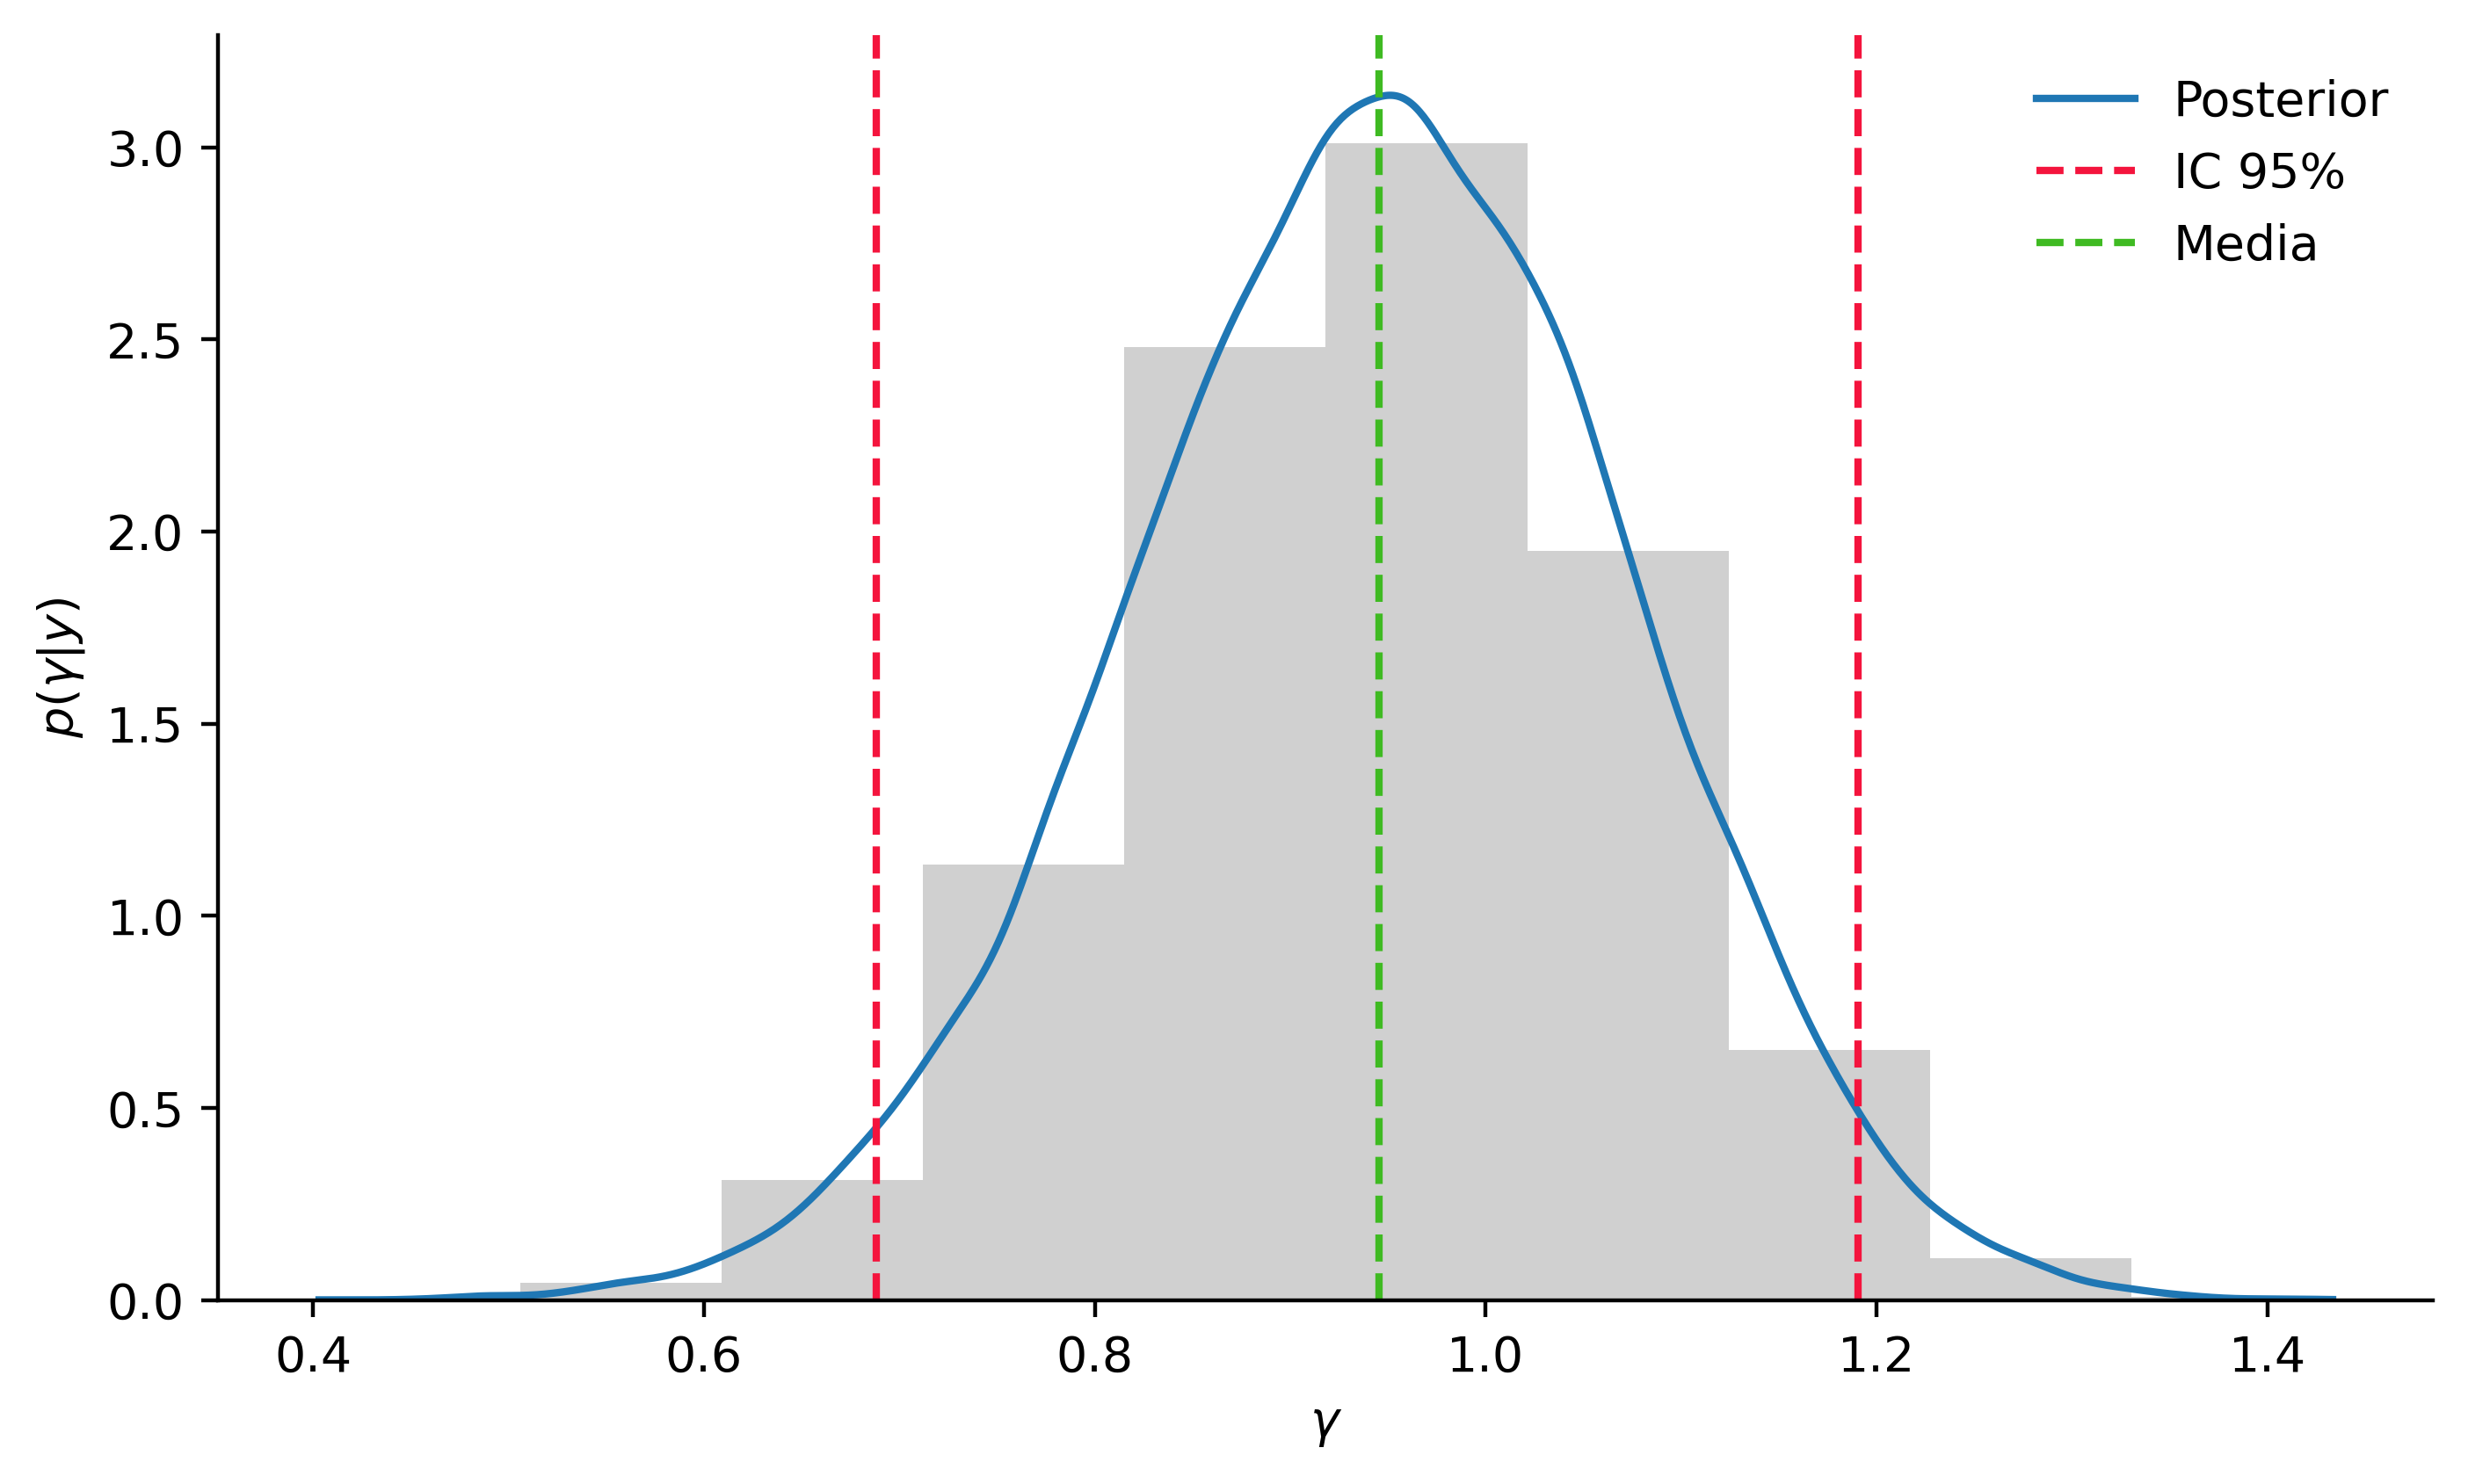

In [9]:
# grafico
f = plt.figure(figsize = (7,4), dpi = 400)
axes = f.add_axes([0.1,0.1,0.9,0.9])
axes.set_xlabel(r'$\gamma$')
axes.set_ylabel(r'$p(\gamma|y)$')
#
axes.hist(gamma_mc,color = '#d0d0d0',density = True)
#
gamma_grid = np.linspace(np.min(gamma_mc) ,np.max(gamma_mc), num = 1000)
axes.plot(gamma_grid, st.gaussian_kde(gamma_mc)(gamma_grid), label = 'Posterior')
#
axes.axvline(x = np.quantile(gamma_mc, q = [0.025]), color = '#F4143D', label = 'IC 95%', ls = '--')
axes.axvline(x = np.quantile(gamma_mc, q = [0.975]), color = '#F4143D', ls = '--')
axes.axvline(x = np.mean(gamma_mc), color = '#3FBA22', label = 'Media', ls = '--')
#
plt.legend(loc = 0, frameon = False)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
plt.show()

### 6.3 Distribución predictiva posterior

In [10]:
# distribucion predictiva posterior
np.random.seed(1234)
y1_mc = st.poisson.rvs(theta1_mc, size = B)
y2_mc = st.poisson.rvs(theta2_mc, size = B)
# media predictiva posterior
tab = [[(a+s1)/(b+n1), (a+s2)/(b+n2)], [np.mean(y1_mc), np.mean(y2_mc)]]
tab = pd.DataFrame(data = tab, columns = ["Menos que pregrado", "Pregrado o más"], index = ["Exacta", "Aproximada"])
round(tab, 3)

,Menos que pregrado,Pregrado o más
Exacta,2.107,1.162
Aproximada,2.107,1.162


In [11]:
# probabilidades de la distribucion predictiva muejres sin pregrado o menos
tab = [st.nbinom.pmf(k = range(8), n = a + s1, p = 1/(1+1/(b+n1))),
       np.array(pd.DataFrame(y1_mc).value_counts(normalize = True)[range(8)])]
tab = pd.DataFrame(data = tab,index = ['Exacto', 'Aproximado'], columns = range(8))
round(tab, 3)

,0,1,2,3,4,5,6,7
Exacto,0.122,0.256,0.270,0.189,0.100,0.042,0.015,0.004
Aproximado,0.121,0.256,0.271,0.191,0.099,0.042,0.015,0.004


In [12]:
# probabilidades de la distribucion predictiva mujeres con pregrado o mas
tab = [st.nbinom.pmf(k = range(8), n = a + s2, p = 1/(1+1/(b+n2))),
       np.array(pd.DataFrame(y2_mc).value_counts(normalize = True)[range(8)])]
tab = pd.DataFrame(data = tab,index = ['Exacto', 'Aproximado'], columns = range(8))
round(tab, 3)

,0,1,2,3,4,5,6,7
Exacto,0.314,0.362,0.210,0.082,0.024,0.006,0.001,0.0
Aproximado,0.313,0.364,0.209,0.083,0.024,0.005,0.001,0.0


In [13]:
# probabilidad posterior de que y*_1 > y*_2
round(np.mean(y1_mc > y2_mc), 3)

0.589

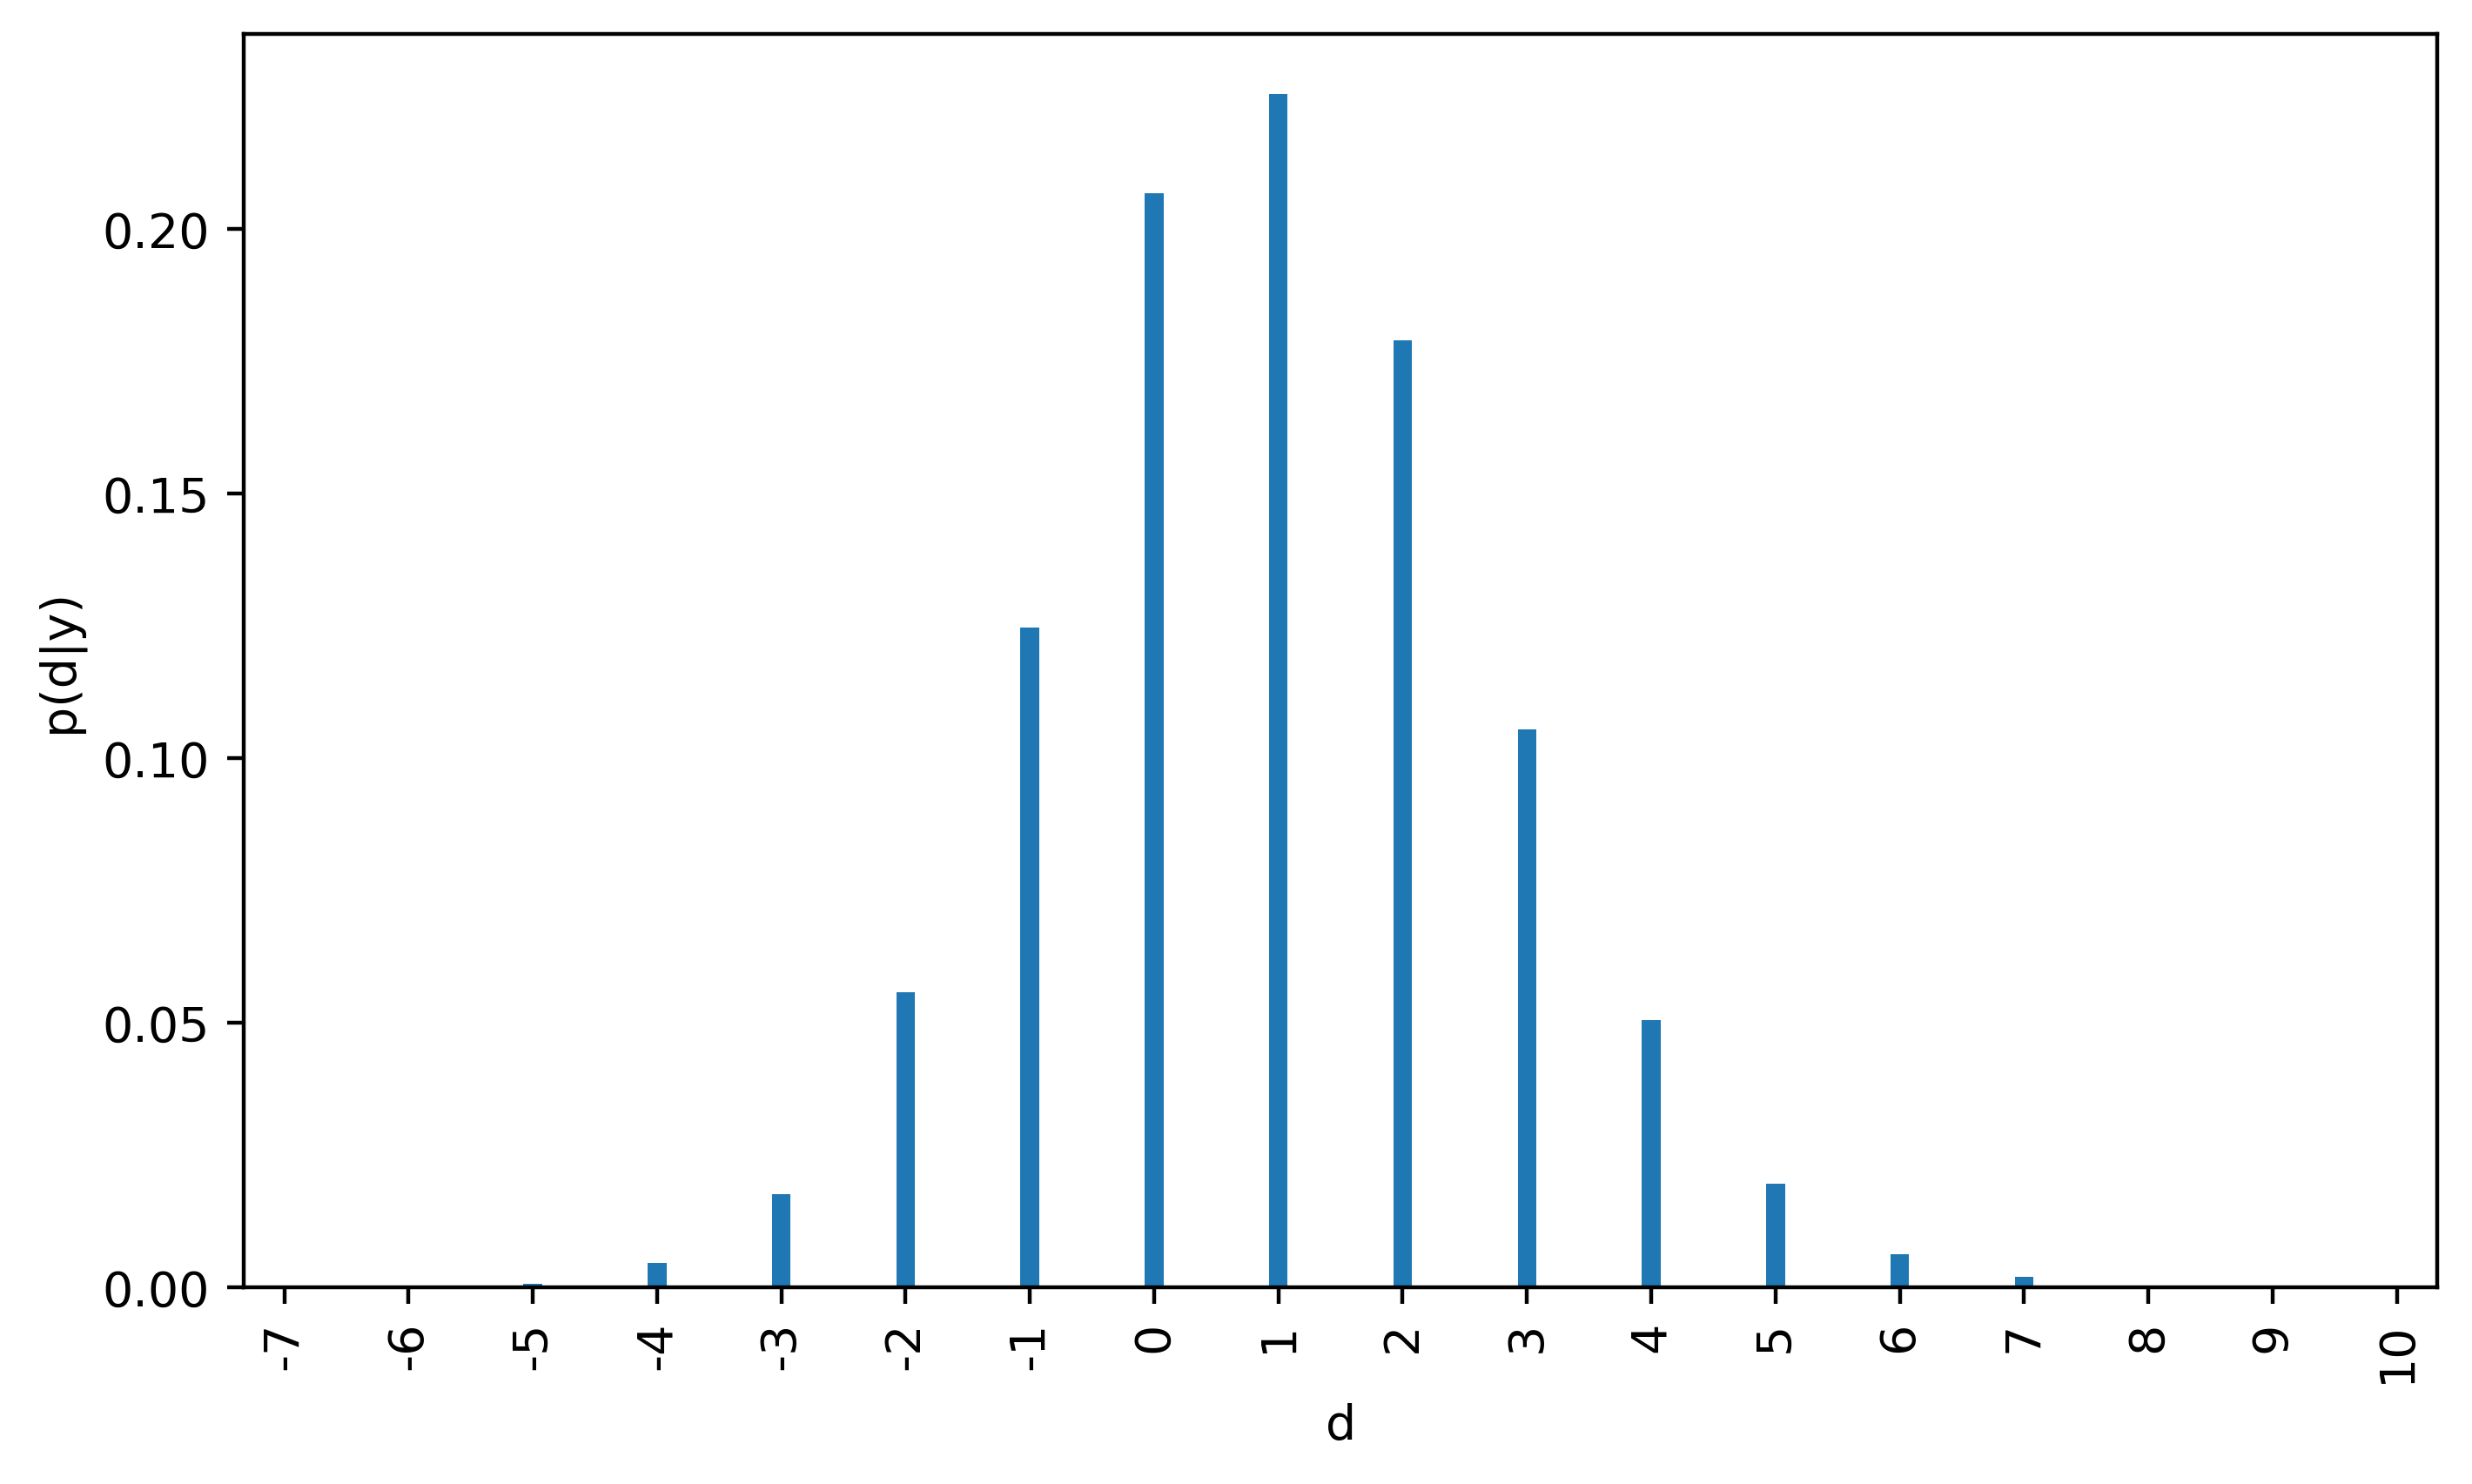

In [14]:
# distribucion predictiva posterior de d = y*_1 - y*_2
f = plt.figure(figsize = (7,4), dpi = 400)
axes = f.add_axes([0.1,0.1,0.9,0.9])
#
d = pd.DataFrame(y1_mc - y2_mc)
d.value_counts(normalize = True,sort = False).plot.bar(ax = axes,width = 0.15)
axes.set_xticks(ticks = range(len(d[0].unique())), labels = range(-7,11))
axes.set_xlabel('d')
axes.set_ylabel('p(d|y)')
# 
plt.show()

### 6.4 Chequeo del modelo

In [15]:
# estadistico observado
t_obs = s1/n1 - s2/n2
round(t_obs, 3)

0.952

In [16]:
# distribucion predictiva posterior
t_mc = []
np.random.seed(1234)
for i in range(B):
    # datos
    y1_rep = st.poisson.rvs(theta1_mc[i], size = n1)
    y2_rep = st.poisson.rvs(theta2_mc[i], size = n2)
    # estadistico
    t_mc.append(np.mean(y1_rep) - np.mean(y2_rep))

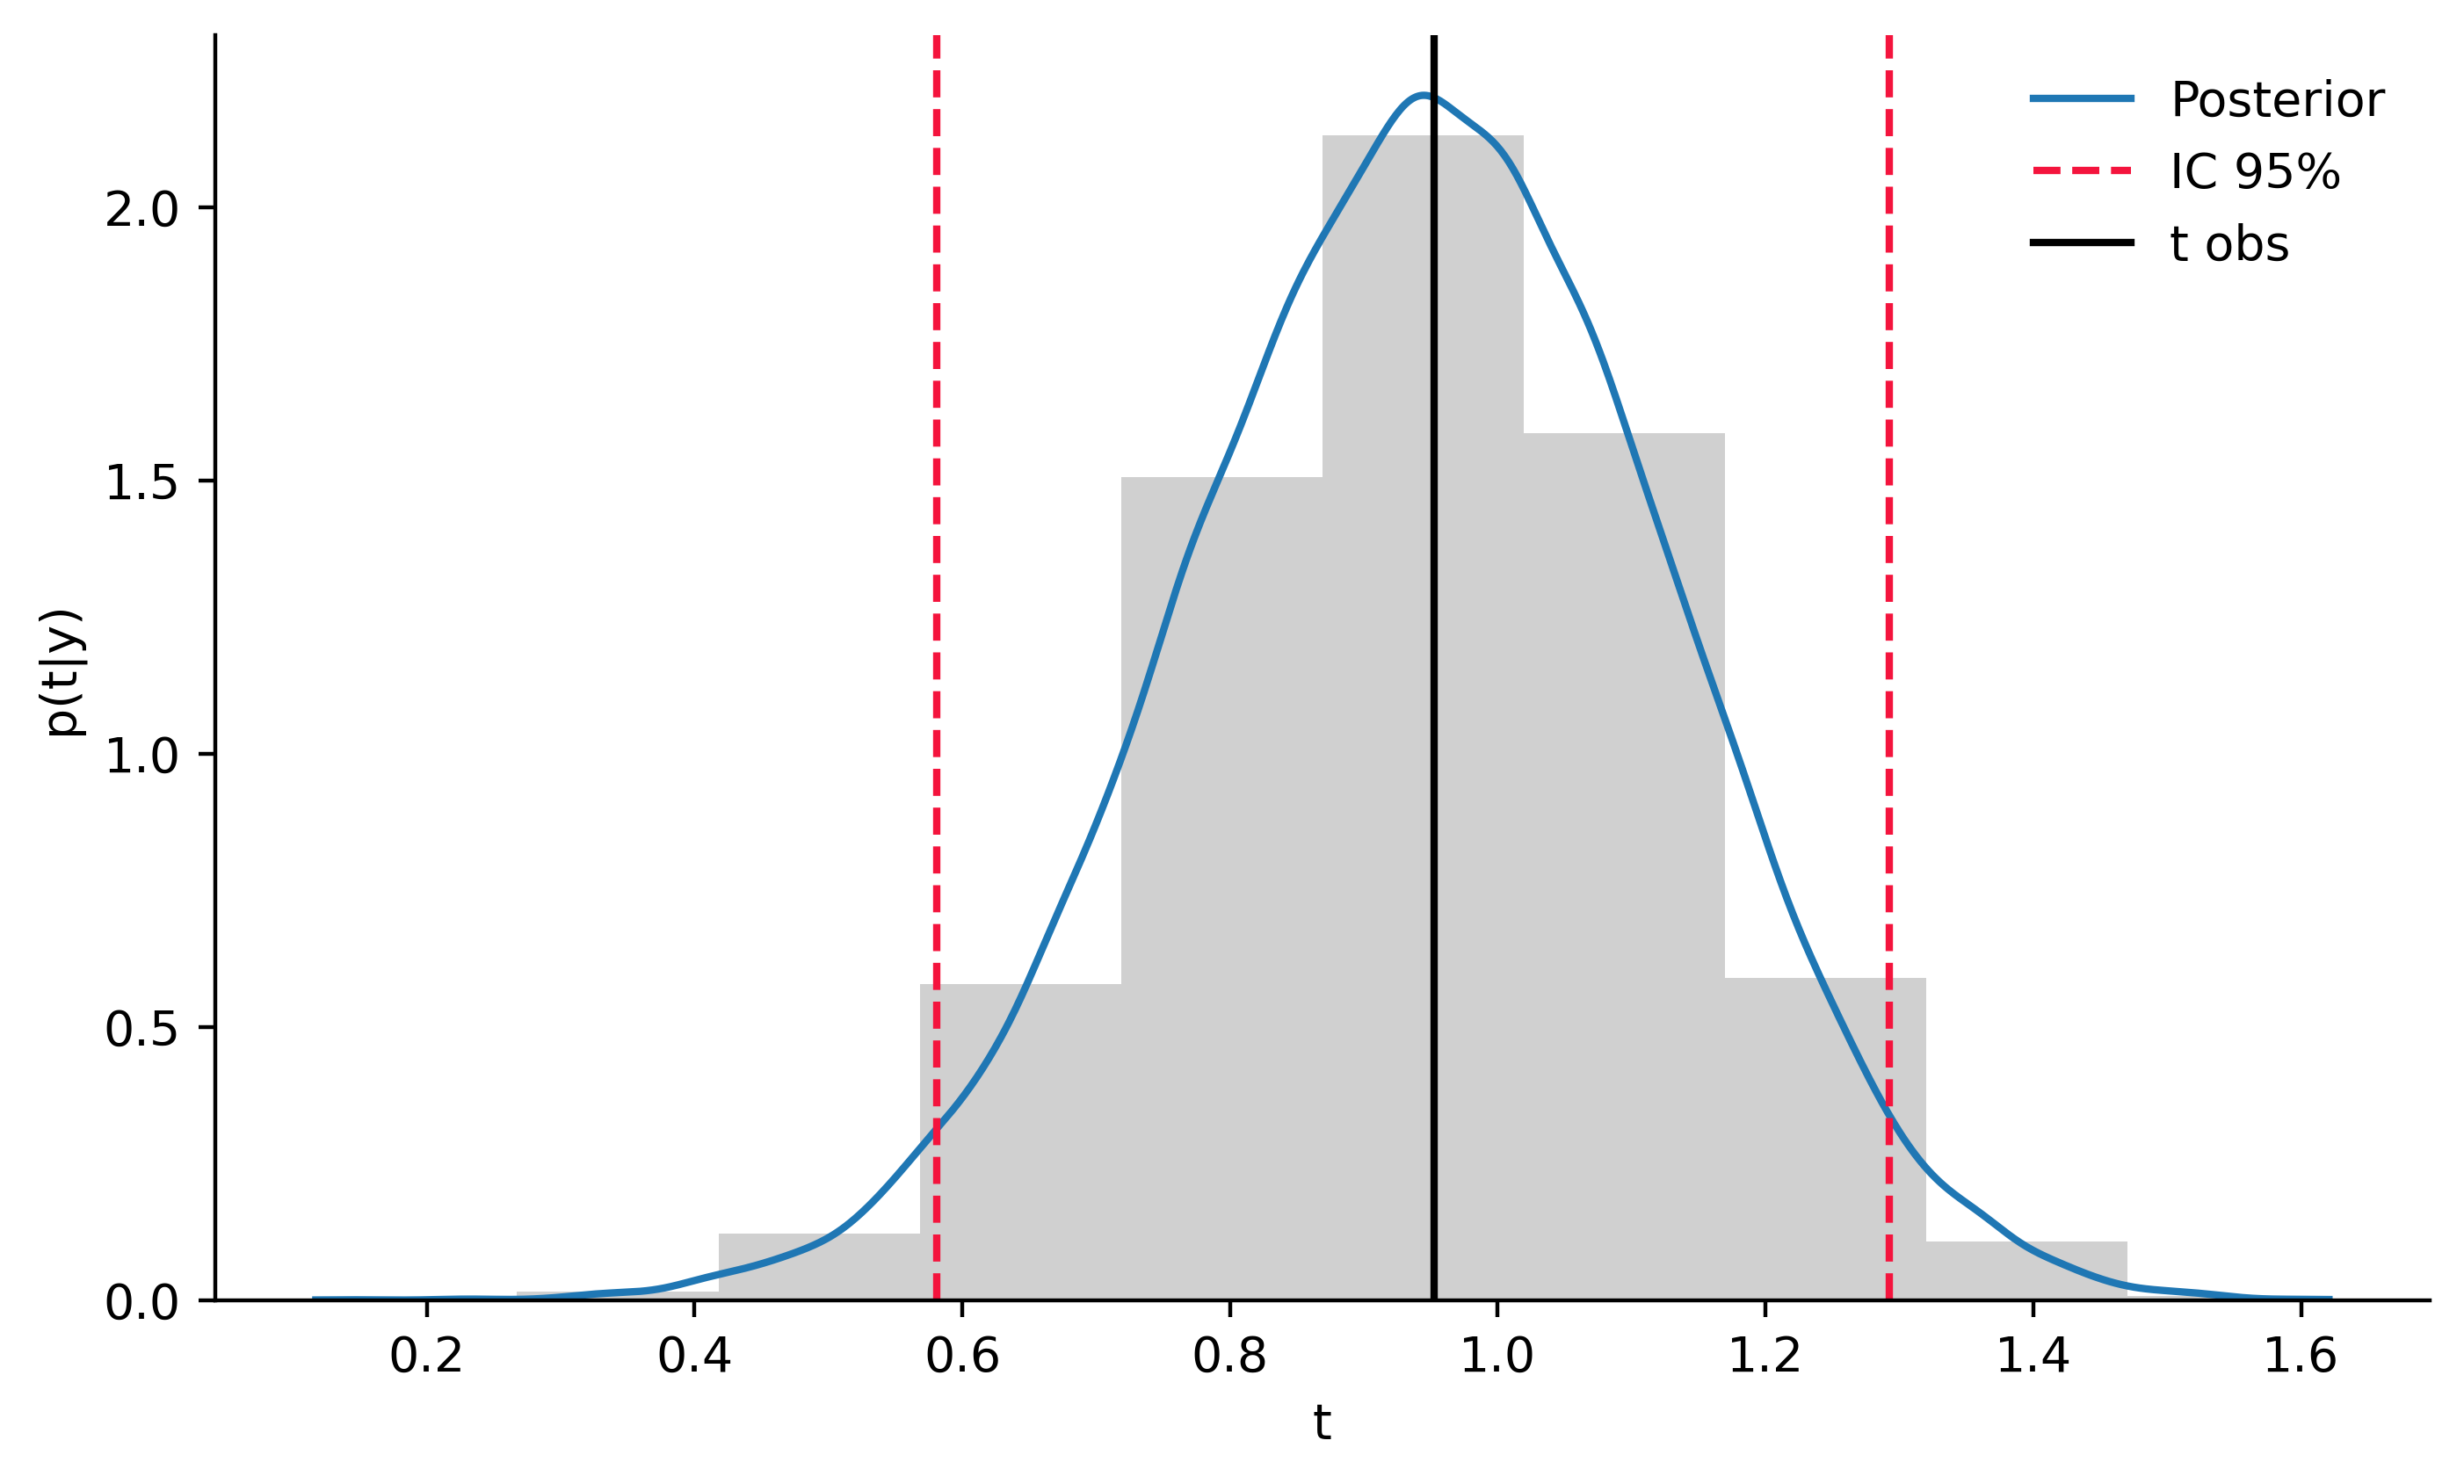

In [17]:
# grafico
f = plt.figure(figsize = (7,4), dpi = 400)
axes = f.add_axes([0.1,0.1,0.9,0.9])
axes.set_xlabel('t')
axes.set_ylabel('p(t|y)')
#
axes.hist(t_mc,color = '#d0d0d0', density = True)
#
t_grid = np.linspace(np.min(t_mc), np.max(t_mc), num = 1000)
axes.plot(t_grid, st.gaussian_kde(t_mc)(t_grid), label = 'Posterior')
#
axes.axvline(x = np.quantile(t_mc, q = [0.025]), color = '#F4143D', label = 'IC 95%', ls = '--')
axes.axvline(x = np.quantile(t_mc, q = [0.975]), color = '#F4143D', ls = '--')
axes.axvline(x = t_obs, color = 'black', label = 't obs')
#
plt.legend(loc = 0,frameon=False)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
plt.show()

In [18]:
# ppp (valor p predictivo posterior)
np.mean(np.array(t_mc) > t_obs)

0.4878

## 9 Referencias

![Hoff](Hoffcoverbook.jpg)

![Gelman](Gelmancoverbook.png)